### Objective 
1. Learn and use how to use Keras to build a simple linear regression model 
2. Pre-train model with first clearning dataset
3. Model training and testing 
4. Check for errors in the model 

In [1]:
# Importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
# Ignore warnings 
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [2]:
url = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv"

df = pd.read_csv(url)

df.head(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
# Data-Preprocessing and Feature Selection
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [4]:
# Predictor dataset preprocessing 
predictor = df.drop(['Strength'], axis= 1)
target = df['Strength']

In [5]:
# Using Normalization of predictor features 
norm_features = (predictor - np.mean(predictor)) / np.std(predictor)

In [7]:
# Neural network model 
from keras.models import Sequential
from keras.layers import Input, Dense

# Extract number of features in predictor 
n_cols = norm_features.shape[1]

# Model layout 
def linear_model():
    model = Sequential()
    model.add(Input(shape= (n_cols,)))
    model.add(Dense(4, activation= 'relu'))
    model.add(Dense(4, activation= 'relu'))
    model.add(Dense(1,))

    # Combine kerastensor with each other 
    model.compile(optimizer= 'adam', loss= 'mean_squared_error')
    return model

training = linear_model()


In [17]:
# Model training on this neural network 
train = training.fit(norm_features, target, validation_split= 0.3, epochs= 100, verbose= 2)

Epoch 1/100
23/23 - 0s - 9ms/step - loss: 212.6811 - val_loss: 139.5390
Epoch 2/100
23/23 - 0s - 11ms/step - loss: 210.7738 - val_loss: 141.1368
Epoch 3/100
23/23 - 0s - 7ms/step - loss: 209.7841 - val_loss: 136.1323
Epoch 4/100
23/23 - 0s - 7ms/step - loss: 208.4997 - val_loss: 138.6881
Epoch 5/100
23/23 - 0s - 7ms/step - loss: 206.5393 - val_loss: 138.7653
Epoch 6/100
23/23 - 0s - 5ms/step - loss: 204.8520 - val_loss: 136.2962
Epoch 7/100
23/23 - 0s - 5ms/step - loss: 204.0558 - val_loss: 138.7739
Epoch 8/100
23/23 - 0s - 5ms/step - loss: 202.6775 - val_loss: 134.2300
Epoch 9/100
23/23 - 0s - 5ms/step - loss: 201.1400 - val_loss: 137.4528
Epoch 10/100
23/23 - 0s - 5ms/step - loss: 199.7128 - val_loss: 135.5261
Epoch 11/100
23/23 - 0s - 5ms/step - loss: 198.9373 - val_loss: 134.7391
Epoch 12/100
23/23 - 0s - 5ms/step - loss: 197.6860 - val_loss: 133.7296
Epoch 13/100
23/23 - 0s - 5ms/step - loss: 196.5005 - val_loss: 133.7422
Epoch 14/100
23/23 - 0s - 5ms/step - loss: 194.9943 - val_l

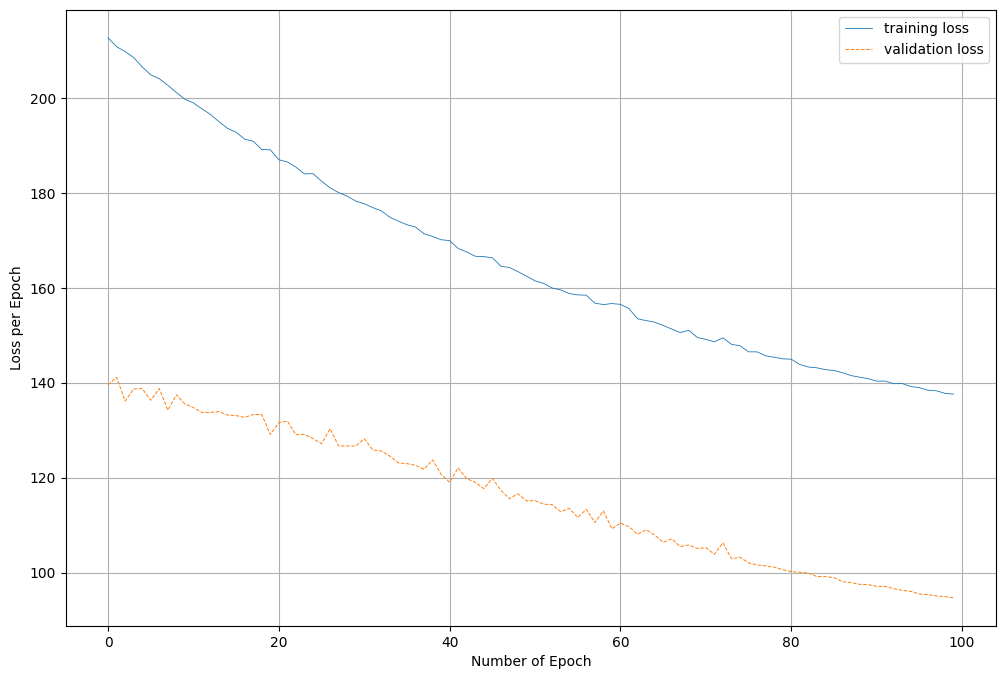

In [22]:
# Visualize each loss per epoch
plt.figure(figsize= (12, 8))

plt.plot(train.history['loss'], label= 'training loss', linewidth= 0.6)
plt.plot(train.history['val_loss'], label= 'validation loss', linewidth= 0.7, linestyle= '--')
plt.grid(visible= True)
plt.xlabel('Number of Epoch')
plt.ylabel('Loss per Epoch')
plt.legend()
plt.show()

In [27]:
predict = training.predict(norm_features)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


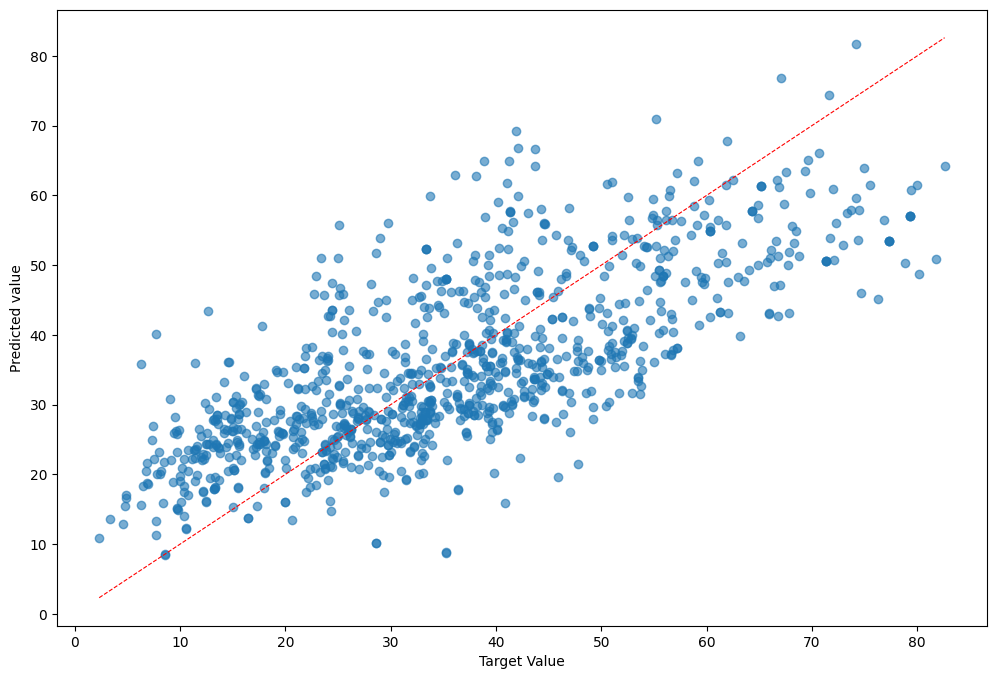

In [32]:
# Visualize target and prediction 
plt.figure(figsize=(12, 8))

plt.scatter(target, predict, alpha= 0.6)
plt.plot([target.min(), target.max()], [target.min(), target.max()], linestyle= '--', linewidth= 0.8, color= 'red')
plt.xlabel('Target Value')
plt.ylabel('Predicted value')
plt.show()